<a href="https://www.kaggle.com/code/joshuakalobbowles/vivino-exploratory-analysis?scriptVersionId=96342331" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
## Import Modules

import numpy as np 
import pandas as pd 

import requests
from bs4 import BeautifulSoup

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import KFold, cross_val_score, GridSearchCV, train_test_split

from sklearn.preprocessing import LabelEncoder, RobustScaler

from sklearn.linear_model import Lasso, Ridge
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor


from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import KFold, cross_val_score

#### Introduction: 
This notebook is an exploratory analysis for beginners. The data has been cleaned and prepared for analysis prior to upload into Kaggle.

## Step 1: Read Vivino Data into data Frame and Review the Data

In [2]:
vino = pd.read_csv('/kaggle/input/vivino-wine-data-top-10-countries-exchina/vivino_top_ten.csv')

In [3]:
# Review data types for any inconsistencies
vino.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12205 entries, 0 to 12204
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Winery         12205 non-null  object 
 1   Year           12190 non-null  object 
 2   Wine_ID        12205 non-null  int64  
 3   Wine           12205 non-null  object 
 4   Rating         12205 non-null  float64
 5   Reviews        12205 non-null  int64  
 6   Price          12205 non-null  float64
 7   Region         12205 non-null  object 
 8   Primary_Grape  12205 non-null  object 
 9   Natural        12205 non-null  bool   
 10  Country        12205 non-null  object 
 11  Style          12205 non-null  object 
 12  Country_Code   12205 non-null  object 
dtypes: bool(1), float64(2), int64(2), object(8)
memory usage: 1.1+ MB


Only one concern here... the 'Year'. As such we may need to convert the 'Year' to an integer. However, we will come back to this as the need arises.

In [4]:
# Review the years to see why the data is an object and not an integer or float.
vino.Year.unique()

array(['2020', 'N.V.', '2018', '2019', '2021', '2017', '2016', '2015',
       '2014', '2010', '2003', '2013', '2011', '1993', '1999', '2012',
       '2007', '2004', '2009', '2005', '2001', '2006', '2008', '2002',
       '1995', '1998', '1994', '1992', nan, '1911', '1980', '2000',
       '1996', '1997', '1929', '1990', '1957', '1985', '1983', '1988',
       '1989', '1977', '1965', '1961', '1991', '1979', '1975', '1981',
       '1966', '1982', '1967', '1964', '1970', '1976', '1987', '1974',
       '1968', '1978', '1900', '1960'], dtype=object)

'N.V.' stands for non-vintage wine and can consist of mixture of years.

However, let's look into the 'nan'.

In [5]:
df_nan = vino[vino['Year'].isna()]
df_nan

,Winery,Year,Wine_ID,Wine,Rating,Reviews,Price,Region,Primary_Grape,Natural,Country,Style,Country_Code
3666,Juvé & Camps,NaN,1172358,Cava Reserva Brut Cinta Purpura,3.7,5830,7.94,Cava,Tempranillo,False,Spain,Sparkling,ESP
3803,Oriol Rossell,NaN,1750566,Cava Brut Nature,3.6,194,8.25,Cava,Tempranillo,False,Spain,Sparkling,ESP
4373,Sieur d'Arques,NaN,2022125,Première Bulle Brut,3.7,720,10.88,Blanquette de Limoux,Pinot Noir,False,France,Sparkling,FRA
4541,Château Pierre-Bise,NaN,1240097,Crémant de Loire,3.8,527,14.40,Crémant de Loire,Pinot Noir,False,France,Sparkling,FRA
5112,Drappier,NaN,11943,Carte d'Or Brut Champagne,3.9,12601,28.90,Champán,Pinot Noir,False,France,Sparkling,FRA
5250,Thienot,NaN,1913511,Brut Champagne,3.9,3029,33.75,Champán,Pinot Noir,False,France,Sparkling,FRA
5516,Thienot,NaN,1843528,Brut Rosé Champagne,3.9,734,45.50,Champán,Pinot Noir,False,France,Sparkling,FRA
5556,Brotte,NaN,1130386,La Fiole du Pape Père Anselme Châteauneuf-du-P...,4.1,21029,48.50,Châteauneuf-du-Pape,Pinot Noir,False,France,Red,FRA
5617,Deutz,NaN,1142212,Rosé Brut Champagne,4.1,7033,52.01,Champán,Pinot Noir,False,France,Sparkling,FRA
5692,Tarlant,NaN,5263588,Rosé Zero Brut Nature Champagne,4.0,247,58.50,Champán,Pinot Noir,True,France,Sparkling,FRA


There appears to be more sparkling wine with only a few reds and whites in the mix... But how many are there?

In [6]:
print(vino['Year'].isnull().sum())

15


#### From here we have a few options:

First, we can define these under the 'N.V' tag as a way to standardize them.

Second, we can assign the nulls and the 'N.V.' wines a identifying year to lump them together. This is the preferred method if we decide to analyze the data based on years.

In [7]:
vino['Year'] = vino['Year'].fillna(2025)
vino['Year'] = vino['Year'].replace('N.V.', 2025) 
vino['Year'] = vino['Year'].astype('int')

In [8]:
vino.describe()

,Year,Wine_ID,Rating,Reviews,Price
count,12205.000000,1.220500e+04,12205.000000,12205.000000,12205.000000
mean,2017.085948,2.122684e+06,3.919992,498.468005,42.610824
std,5.205156,2.068168e+06,0.322382,2333.570088,116.172437
min,1900.000000,5.310000e+02,1.900000,25.000000,2.070000
25%,2016.000000,1.135203e+06,3.700000,55.000000,8.950000
50%,2018.000000,1.425545e+06,3.900000,122.000000,17.900000
75%,2019.000000,2.486838e+06,4.100000,330.000000,37.000000
max,2025.000000,1.020577e+07,4.900000,114425.000000,6511.310000


## Step 2: Ratings Analysis

Now that we have an overview of the data, we can start by looking into the ratings.

*I will be using some graphing standards for later publication as an added bonus!

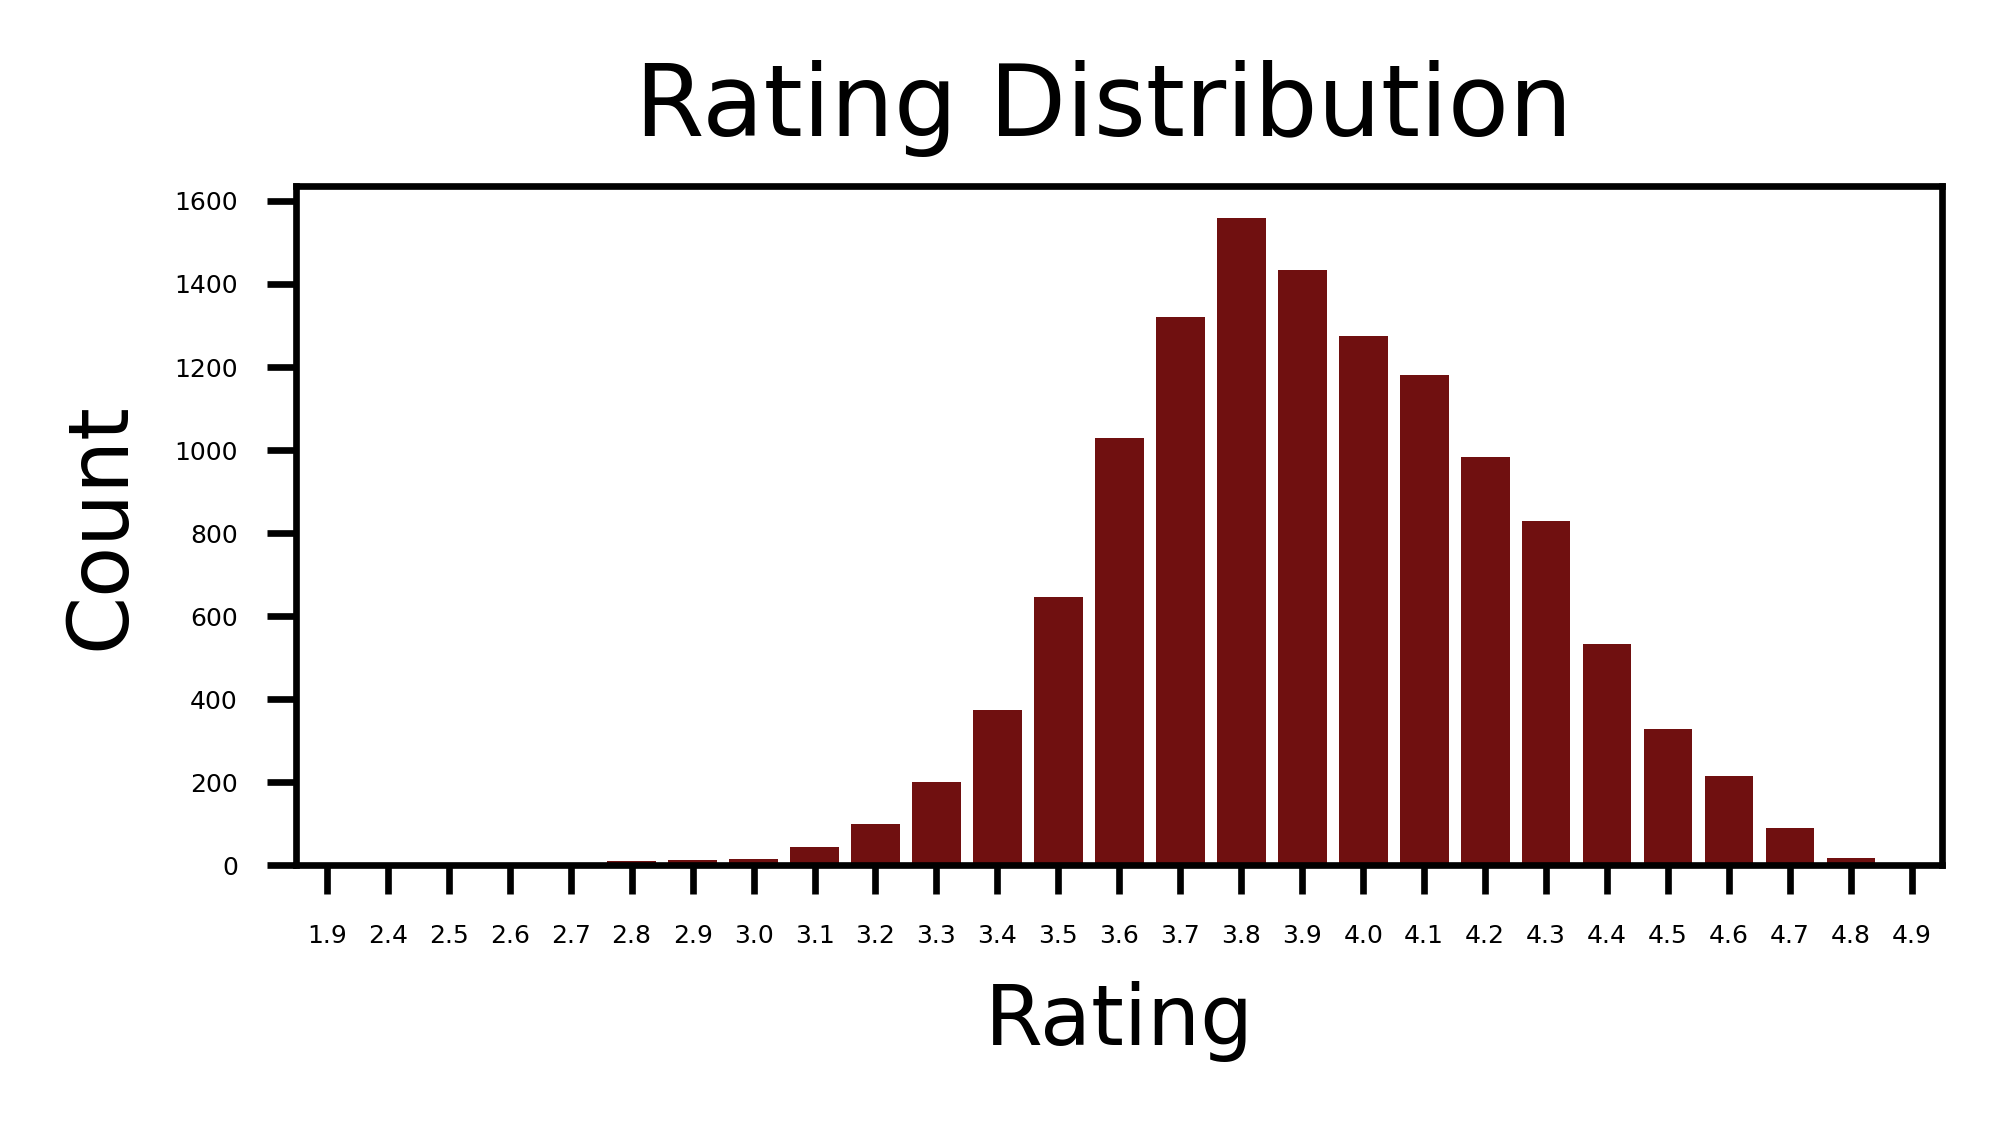

In [9]:
plt.figure(figsize=(3.54, 1.5), dpi=600)
graph = sns.countplot(x='Rating', data=vino, color='maroon')
graph.set_title("Rating Distribution ", fontsize=12)
graph.set_xlabel("Rating", fontsize=10) 
graph.set_ylabel("Count", fontsize=10)
graph.tick_params(labelsize=3)

plt.show()

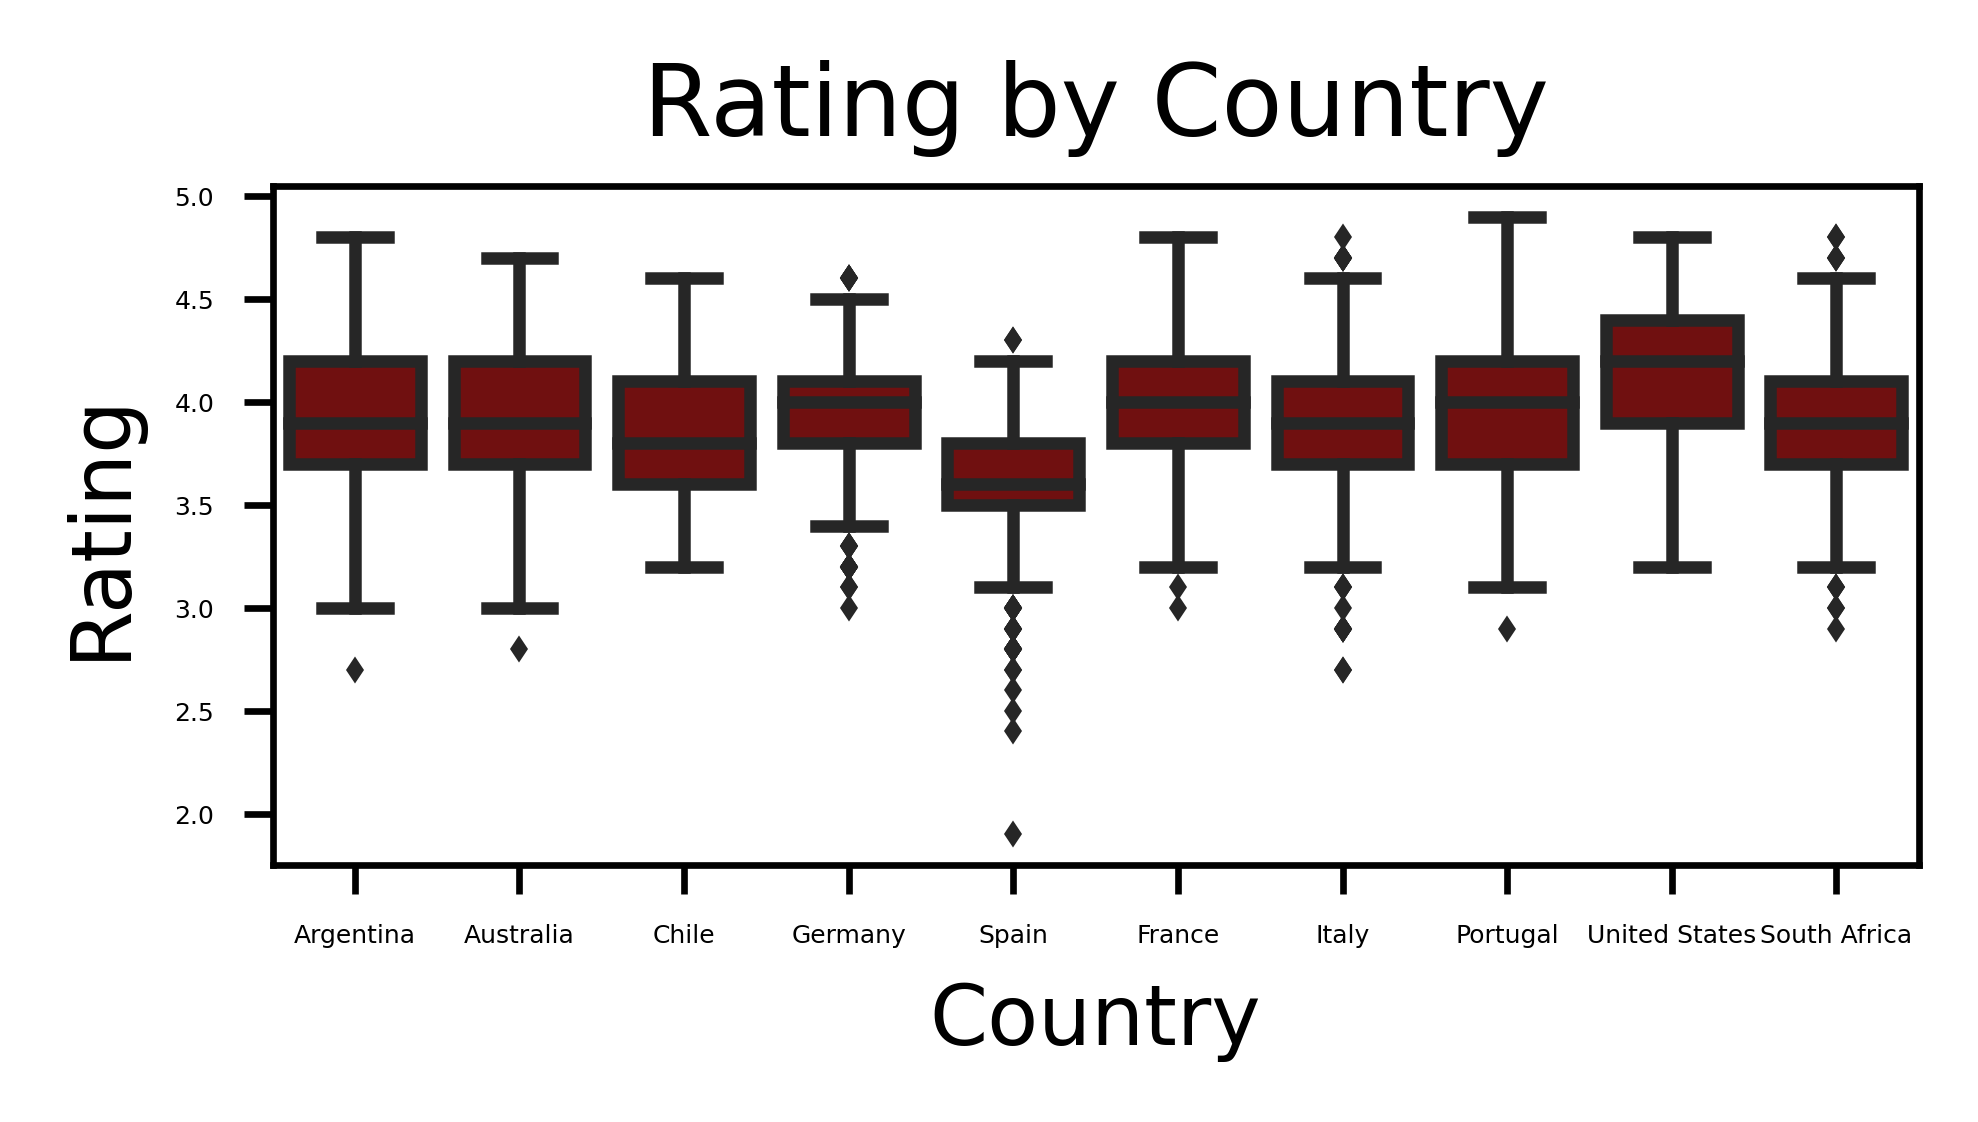

In [10]:
plt.figure(figsize=(3.54,1.5), dpi=600)

country = vino.Country.value_counts()

graph = sns.boxplot(x='Country', y='Rating',
                 data=vino[vino.Country.isin(country.index.values)],
                 color='maroon', flierprops=dict(markersize=1)) #flierprops = dict(marker='o', markerfacecolor='None', markersize=2, markeredgecolor='black')
graph.set_title("Rating by Country", fontsize=12)
graph.set_xlabel("Country", fontsize=10)
graph.set_ylabel("Rating", fontsize=10)
graph.set_xticklabels(graph.get_xticklabels())
graph.tick_params(labelsize=3)
plt.show()

### 2A: Volumn Analysis

Interestingly enough, we see that Spain has the lowest average rating amongst the largest wine producers!

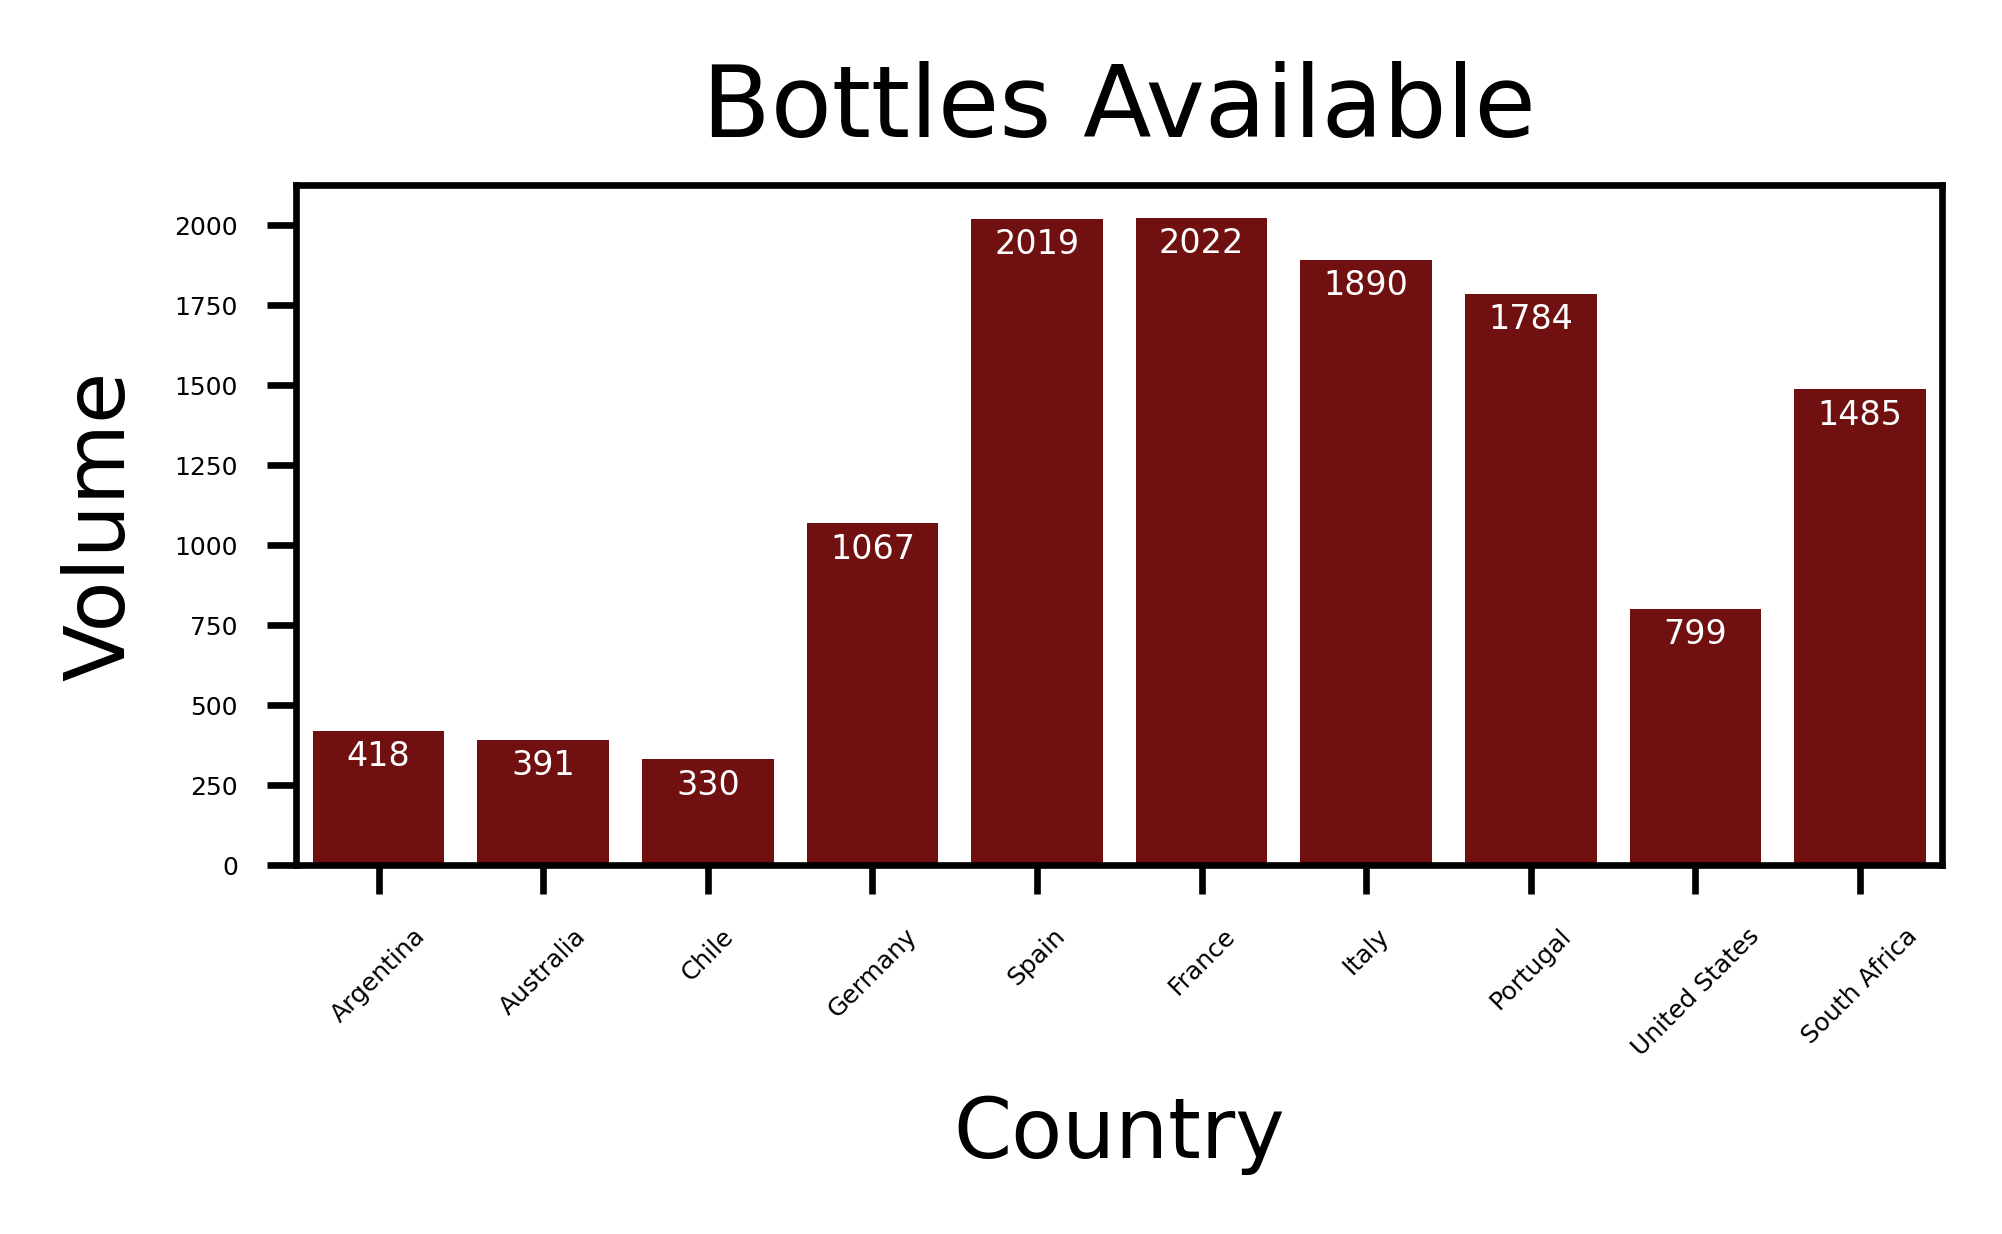

In [11]:
plt.figure(figsize=(3.54,1.5), dpi=600)

country = vino.Country.value_counts()

graph = sns.countplot(x='Country',
                      data=vino[vino.Country.isin(country.index.values)],
                      color='maroon')

graph.bar_label(graph.containers[0], label_type='edge', padding=-5, fontsize=4, color='white')
graph.set_title("Bottles Available", fontsize=12)
graph.set_xlabel("Country", fontsize=10)
graph.set_ylabel("Volume", fontsize=10)
graph.set_xticklabels(graph.get_xticklabels(),rotation=45)
graph.tick_params(labelsize=3)

plt.show()

Based on the volumn produced, it seems impressive from a high level that France not only has such a large production but also remains so highly appreciated in so many of its regions.

## Step 3: Price Analysis

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  del sys.path[0]


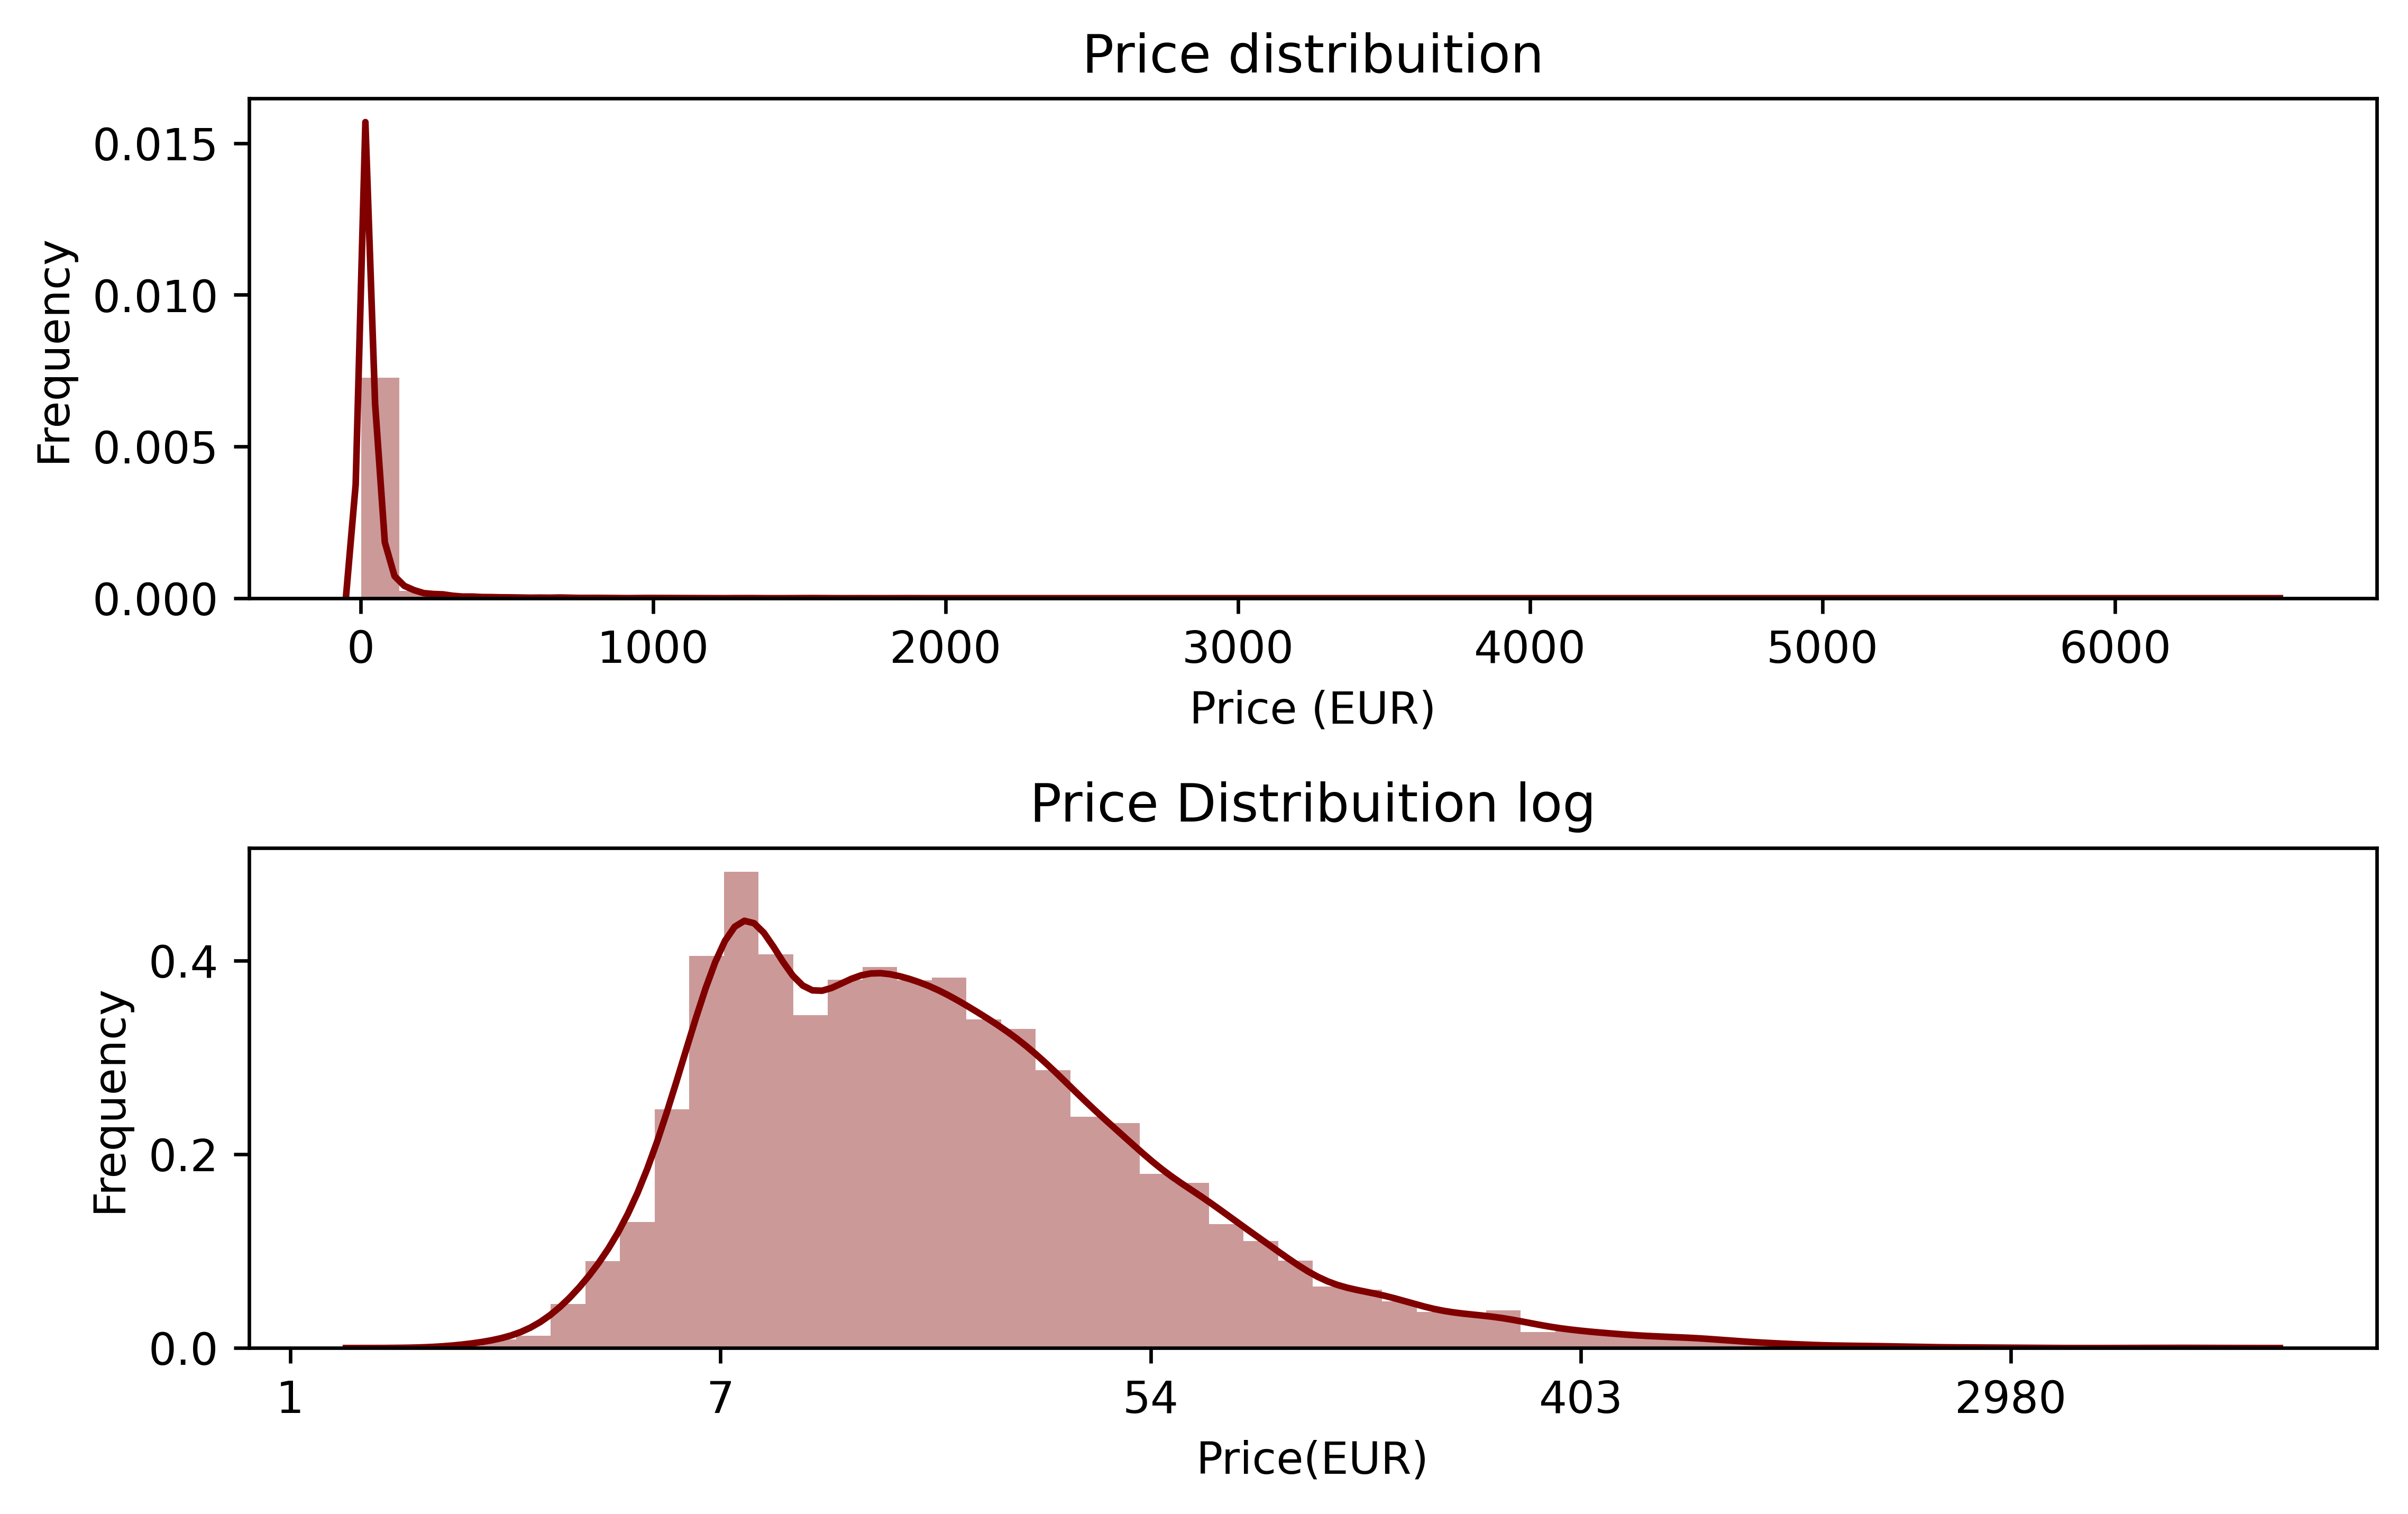

In [12]:
plt.figure(figsize=(8.65,4.5), dpi=600)
plt.subplot(2,1,1)
graph = sns.distplot(vino['Price'], color='maroon')
graph.set_title("Price distribuition", fontsize=12) # seting title and size of font
graph.set_xlabel("Price (EUR)", fontsize=10) # seting xlabel and size of font
graph.set_ylabel("Frequency", fontsize=10) # seting ylabel and size of font

plt.subplot(2,1,2)
graph1 = sns.distplot(np.log(vino['Price']) , color='maroon')
graph1.set_title("Price Distribuition log", fontsize=12) # seting title and size of font
graph1.set_xlabel("Price(EUR)", fontsize=10) # seting xlabel and size of font
graph1.set_ylabel("Frequency", fontsize=10) # seting ylabel and size of font
graph1.set_xticklabels(np.exp(graph1.get_xticks()).astype(int))

plt.subplots_adjust(hspace = 0.5,top = 1)
plt.show()

Most bottles range from 5-54 euros. 

In [13]:
plt.figure(figsize=(16,18), dpi=600)

plt.subplot(3,1,1)
graph = sns.boxplot(x='Year', y=np.log(vino['Price']),
                    data=vino,
                    color='maroon')
graph.set_title("Price by Year", fontsize=12)
graph.set_xlabel("Year", fontsize=10)
graph.set_ylabel("Price(EUR)", fontsize=10)
graph.set_xticklabels(graph.get_xticklabels(),rotation=45)
graph.set_yticklabels(np.exp(graph.get_yticks()).astype(int))

plt.subplot(3,1,2)
graph1 = sns.boxplot(x='Style', y=np.log(vino['Price']),
                 data=vino,
                 color='maroon')
graph1.set_title("Price by WineStyle", fontsize=12)
graph1.set_xlabel("WineStyle", fontsize=10)
graph1.set_ylabel("Price(EUR)", fontsize=10)
graph1.set_xticklabels(graph1.get_xticklabels())
graph1.set_yticklabels(np.exp(graph1.get_yticks()).astype(int))

plt.subplot(3,1,3)
graph2 = sns.boxplot(x='Country', y=np.log(vino['Price']),
                 data=vino[vino.Country.isin(country.index.values)],
                 color='maroon')
graph2.set_title("Price by Country", fontsize=12)
graph2.set_xlabel("Country", fontsize=10)
graph2.set_ylabel("Price(EUR)", fontsize=10)
graph2.set_yticklabels(np.exp(graph2.get_yticks()).astype(int))

plt.subplots_adjust(hspace = 0.3, top = 0.9)

plt.show()

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  # This is added back by InteractiveShellApp.init_path()
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:21: UserWarning: FixedFormatter should only be used together with FixedLocator
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:30: UserWarning: FixedFormatter should only be used together with FixedLocator


The first graph shows a distinct drop in average bottle prices over the years. However, this is also likely due to other factors, as Vivino is a realitively new app with respect the the wine industry. As its adoption has grown in recent years, so too have the overall number of wines it retains data for. Over time, and with continued growth we can expect the average prices to stablize as more wines are added. 

## Step 4: Value Analsyis

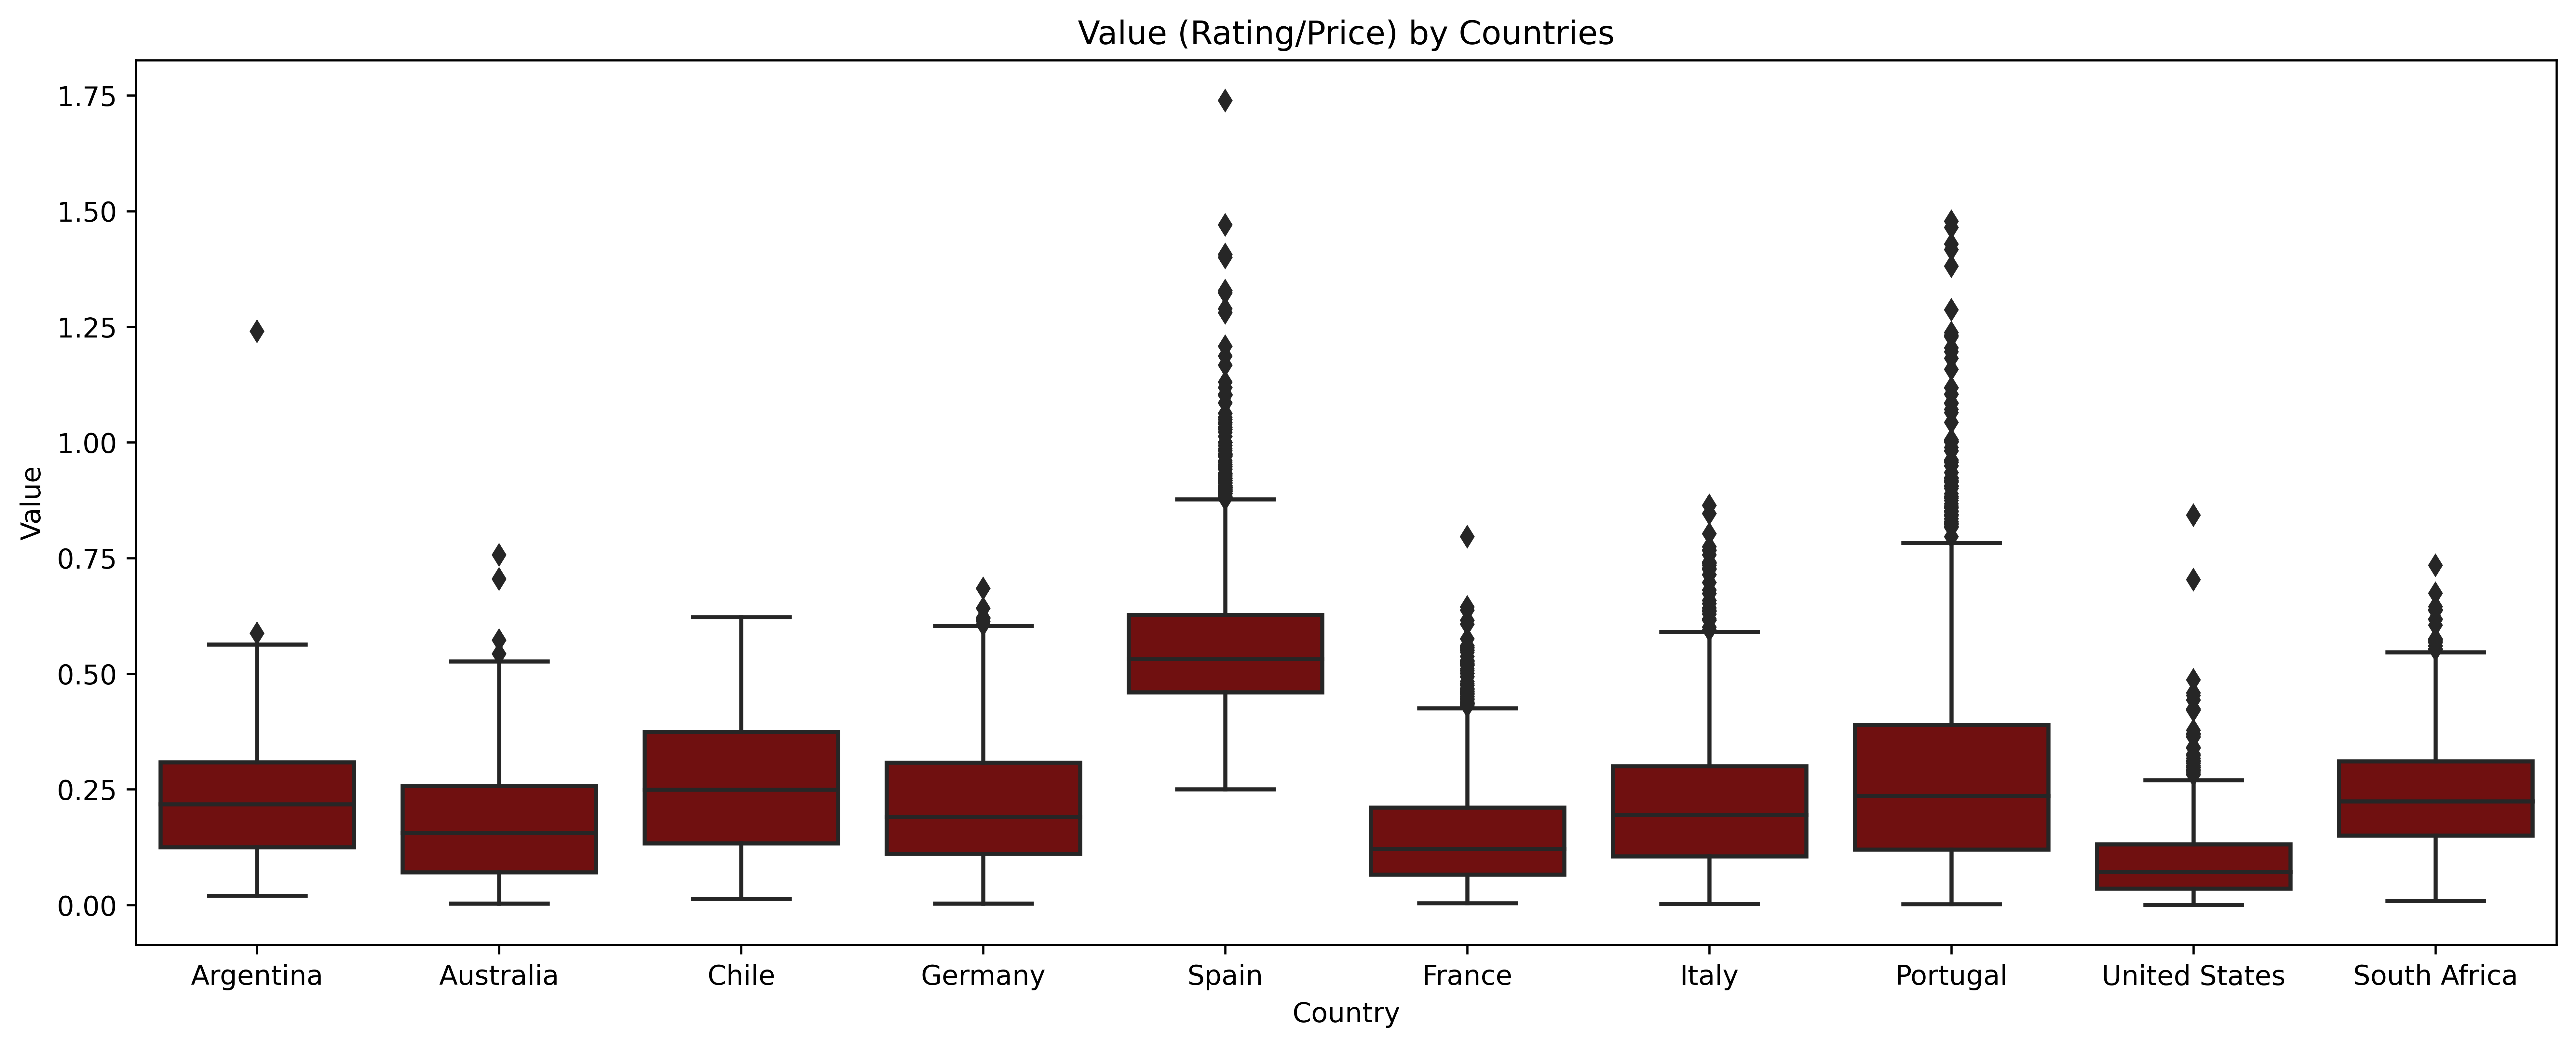

In [14]:
plt.figure(figsize=(16,6), dpi=600)
graph = sns.boxplot(x='Country', y=vino['Rating']/vino['Price'],
                 data=vino[vino.Country.isin(country.index.values)],
                 color='maroon')
graph.set_title("Value (Rating/Price) by Countries", fontsize=12)
graph.set_xlabel("Country", fontsize=10)
graph.set_ylabel("Value", fontsize=10)
graph.set_xticklabels(graph.get_xticklabels())

plt.show()

Value is of notable interest as the data shows Spanish wines have a significant advantage in value over the other countries, even as their wines have a lower average ratings.

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  


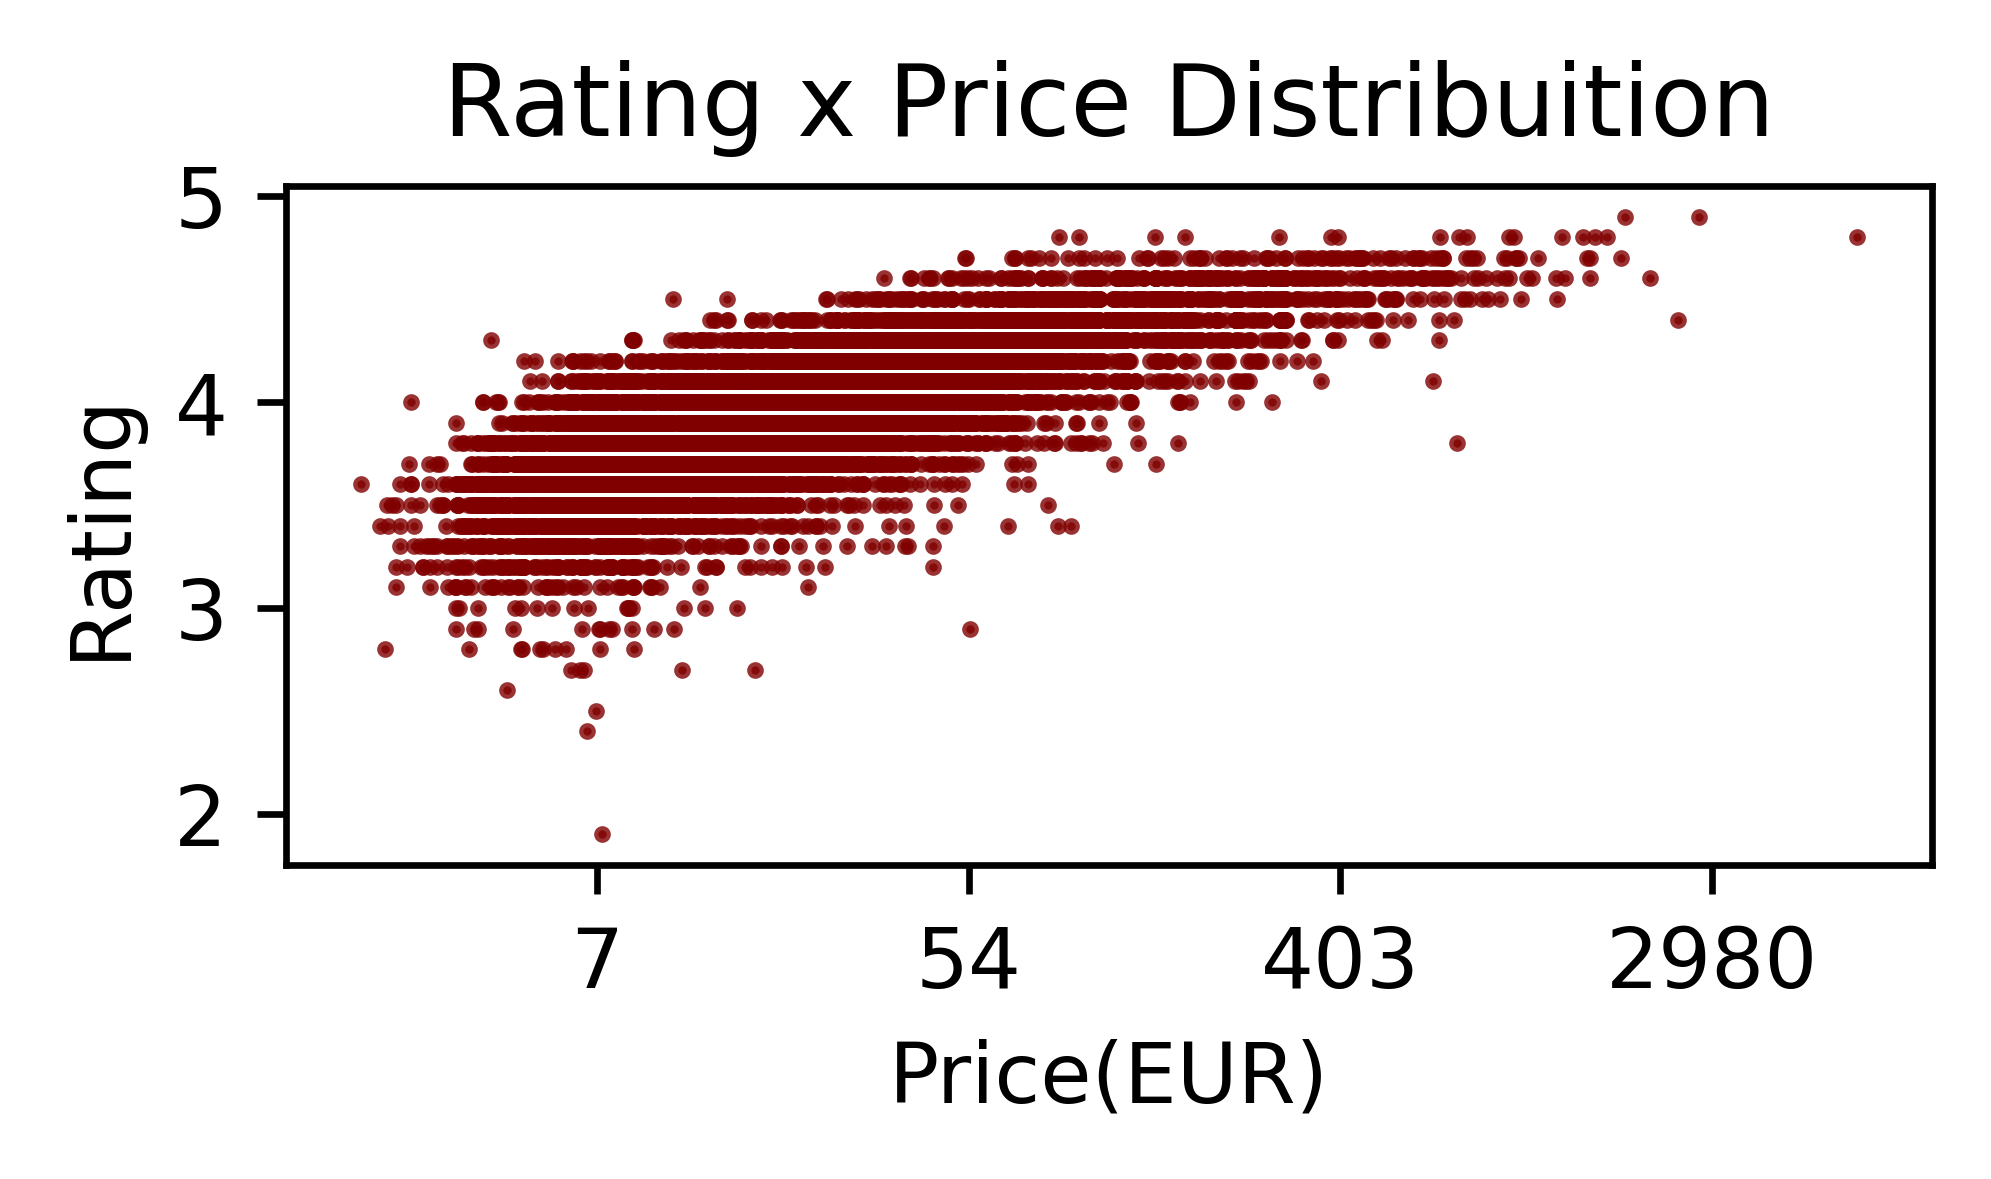

In [15]:
plt.figure(figsize=(3.54,1.5), dpi=600)

graph = sns.regplot(x=np.log(vino['Price']), y='Rating', 
                    data=vino, fit_reg=False, color='maroon', scatter_kws={'s':1})
graph.set_title("Rating x Price Distribuition", fontsize=12)
graph.set_xlabel("Price(EUR)", fontsize= 10)
graph.set_ylabel("Rating", fontsize= 10)
graph.set_xticklabels(np.exp(graph.get_xticks()).astype(int))

plt.show()

Here we start to notice significant trend in price and rating, which largely tops out around 50 euros per bottle. This could be due to the overly simplistic rating system or we might also see a perceived limit on value as higher prices don't add much to overall flavor.  

In [16]:
Rated_Regions = vino['Region'].value_counts()[:100].index #most productive regions
print(vino[vino['Region'].isin(Rated_Regions)].groupby('Region').Rating.mean().sort_values(ascending=False)[:10])
#Regions with the best rating from most productive onece

Region
Valle de Napa              4.353261
Pauillac                   4.327586
Sonoma Coast               4.326923
Pomerol                    4.309375
Paso Robles                4.272222
Brunello di Montalcino     4.271429
Russian River Valley       4.265217
Châteauneuf-du-Pape        4.260000
Pessac-Léognan             4.243243
Saint-Émilion Grand Cru    4.241429
Name: Rating, dtype: float64


Now, let's take a look at the regions with the highest ratings just to see if we recognize any! Odly enough, the distribution is a bit one-sided as 5 of the regions are located in France, 4 regions in California, USA, and only 1 observation in Italy. 

## Step 5: Correlation Analysis

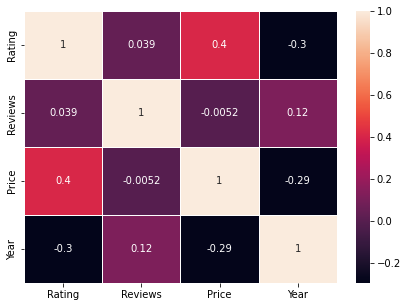

In [17]:
corrs = vino[['Rating','Reviews','Price','Year']].corr() #Heatmap for numetrical columns
fig, ax = plt.subplots(figsize=(7,5))        

sns.heatmap(corrs,annot = True,ax=ax,linewidths=.6, cmap = 'rocket');

Here we note that the largest positive correlation in wine is price and ratings with 0.4. We can also see a positive correlation between the price and the number of reviews at 0.12. lastly, confirming what we saw earlier that the correlation between price and year is negative (-0.29) which speaks to the trend we see in recent years. 

## Step 6: Country Exploratory Analysis

### 6A: Spanish Red by Region

The data shows that while Spain has lower average ratings than its peers, it still remains the best value for wines as determined by Value (Ratings/Price). Since it seems to have the best value in wine, let's take a closer look. 

In [18]:
spain = vino[vino['Country'] == 'Spain']
spain

,Winery,Year,Wine_ID,Wine,Rating,Reviews,Price,Region,Primary_Grape,Natural,Country,Style,Country_Code
2206,Bach,2017,1189024,Extrísimo Semi Dulce 2017,3.6,535,2.07,Cataluña,Tempranillo,False,Spain,White,ESP
2207,Dubois,2025,1273908,Brut N.V.,2.8,182,2.36,Cava,Tempranillo,False,Spain,Sparkling,ESP
2208,Viña Oria,2019,1812139,Garnacha 2019,3.5,327,2.50,Cariñena,Tempranillo,False,Spain,Red,ESP
2209,Viña Oria,2019,1627117,Macabeo 2019,3.2,29,2.50,Cariñena,Tempranillo,False,Spain,White,ESP
2210,Castillo de Liria,2020,1643745,Bobal - Shiraz 2020,3.4,88,2.56,Valencia,Tempranillo,False,Spain,Red,ESP
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4220,Altanza,2015,1557793,Valvarès de Altanza Rioja 2015,3.9,147,9.10,Rioja,Tempranillo,False,Spain,Red,ESP
4221,Baron de Ley,2017,21584,Rioja Reserva 2017,3.8,758,9.10,Rioja,Tempranillo,False,Spain,Red,ESP
4222,Murviedro,2014,6506072,Audentia Reserva 2014,3.5,58,9.12,Valencia,Tempranillo,False,Spain,Red,ESP
4223,Jané Ventura,2016,1992036,Negre Selecció 2016,3.7,47,9.14,Panadés,Tempranillo,False,Spain,Red,ESP


As a bit of a tick from someone who lives in Barcelona, Panadés is often shown as Penedès, so I will be changing this out of personal preference.

In [19]:
spain['Region'] = spain['Region'].replace('Panadés', 'Penedès') 

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [20]:
spain_red = spain[spain['Style'] == 'Red']
spain_red

,Winery,Year,Wine_ID,Wine,Rating,Reviews,Price,Region,Primary_Grape,Natural,Country,Style,Country_Code
2208,Viña Oria,2019,1812139,Garnacha 2019,3.5,327,2.50,Cariñena,Tempranillo,False,Spain,Red,ESP
2210,Castillo de Liria,2020,1643745,Bobal - Shiraz 2020,3.4,88,2.56,Valencia,Tempranillo,False,Spain,Red,ESP
2212,Castillo de Liria,2019,1643745,Bobal - Shiraz 2019,3.6,305,2.56,Valencia,Tempranillo,False,Spain,Red,ESP
2215,Finca Venta de Don Quijote,2020,7166356,Tempranillo - Syrah 2020,3.6,130,2.72,Castilla,Tempranillo,False,Spain,Red,ESP
2217,Schenk Spanish Wineries,2019,1884409,Vega Libre Tinto 2019,3.2,304,2.90,Valencia,Tempranillo,False,Spain,Red,ESP
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4219,Finca de la Rica,2017,1258041,El Buscador 2017,3.6,62,9.10,Rioja,Tempranillo,False,Spain,Red,ESP
4220,Altanza,2015,1557793,Valvarès de Altanza Rioja 2015,3.9,147,9.10,Rioja,Tempranillo,False,Spain,Red,ESP
4221,Baron de Ley,2017,21584,Rioja Reserva 2017,3.8,758,9.10,Rioja,Tempranillo,False,Spain,Red,ESP
4222,Murviedro,2014,6506072,Audentia Reserva 2014,3.5,58,9.12,Valencia,Tempranillo,False,Spain,Red,ESP


Within Spain there exist many different regions, which seems like a good place to start. However, a quick review of the regions shows that the regions may be a little different from what we would expect. For one, there is no 'Cava' region in Spain. Instead we know that Cava is a sparkling wine styled after Champagne that is vinted mostly in Catalonia. 

In [21]:
spain_red.Region.value_counts().nlargest(12)

Rioja               261
Ribera del Duero    110
Cariñena             51
Navarra              48
Jumilla              45
Somontano            40
Montsant             38
Castilla             34
Toro                 33
Empordà              32
Penedès              31
Valencia             30
Name: Region, dtype: int64

In [22]:
plt.figure(figsize=(16,18), dpi=600)

region = spain_red.Region.value_counts().nlargest(12)

graph = sns.boxplot(x='Region', y=spain_red['Rating']/spain_red['Price'],
                 data=spain_red[spain_red.Region.isin(region.index.values)],
                 color='maroon')
graph.set_title("Value (Rating/Price) by Region", fontsize=12)
graph.set_xlabel("Region", fontsize=10)
graph.set_ylabel("Value", fontsize=10)
graph.set_xticklabels(graph.get_xticklabels())

plt.show()

Within the most reviewed regions of Spanish Red wines we find several regions with notably higher average value ratings: Carinena, Valencia, Castilla, Navarra and Jumilla. Let's first dive into Cariñena to identify some wineries and wines that might be worth a try. 

## 6A-1 Cariñena



In [23]:
url = 'https://en.wikipedia.org/wiki/Cari%C3%B1ena_(DO)'
page = requests.get(url)
soup= BeautifulSoup(page.content, "html.parser")

# print(soup.prettify())

In [24]:
list(soup.children)

print(soup.find_all('p')[0].get_text())


Cariñena is a Spanish Denominación de Origen Protegida (DOP) for wines located in Cariñena in the province of Zaragoza (Aragón, Spain). It is among the oldest protected growing areas in Europe, the DO having been created in 1932 alongside other Spanish wine regions. Cariñena vineyards are located near the centre of Aragón, about 50 km southwest of Zaragoza, on the Campo de Cariñena plateau. The lower vineyards lie at an altitude of 400 m, rising to 800 m as they approach the Sierra de la Virgen mountains. To the west they border on the Calatayud (DO).



In [25]:
Cariñena = spain_red[spain_red['Region'] == 'Cariñena']


In [26]:
Cariñena['Value'] = Cariñena['Rating']/Cariñena['Price']


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [27]:
Cariñena.sort_values('Value', ascending=False).head(10)

,Winery,Year,Wine_ID,Wine,Rating,Reviews,Price,Region,Primary_Grape,Natural,Country,Style,Country_Code,Value
2208,Viña Oria,2019,1812139,Garnacha 2019,3.5,327,2.500,Cariñena,Tempranillo,False,Spain,Red,ESP,1.400000
2226,Corona de Aragón,2011,2185794,Special Selection 2011,3.5,285,3.225,Cariñena,Tempranillo,False,Spain,Red,ESP,1.085271
2225,Monasterio de Las Vinas,2013,1437023,Crianza 2013,3.5,2097,3.225,Cariñena,Tempranillo,False,Spain,Red,ESP,1.085271
2246,El Circo,2020,1594712,Arlequín Syrah 2020,3.5,27,3.500,Cariñena,Tempranillo,False,Spain,Red,ESP,1.000000
2247,El Circo,2018,3198808,Equilibrista Cariñena 2018,3.5,43,3.500,Cariñena,Tempranillo,False,Spain,Red,ESP,1.000000
2287,Monasterio de Las Vinas,2018,1437023,Crianza 2018,3.8,469,3.900,Cariñena,Tempranillo,False,Spain,Red,ESP,0.974359
2270,El Circo,2020,2137289,Volatinero Tempranillo 2020,3.6,158,3.750,Cariñena,Tempranillo,False,Spain,Red,ESP,0.960000
2245,El Circo,2020,2329302,Acróbata Garnacha 2020,3.3,66,3.500,Cariñena,Tempranillo,False,Spain,Red,ESP,0.942857
2358,Particular,2020,4311709,Garnacha 2020,3.9,90,4.350,Cariñena,Tempranillo,False,Spain,Red,ESP,0.896552
2294,Terrai,2020,2321919,OVG Old Vine Garnacha 2020,3.5,28,3.950,Cariñena,Tempranillo,False,Spain,Red,ESP,0.886076


Here are the top 5 wineries in Cariñena, now let's look at the wines available...

In [28]:
top_cariñena = ['Monasterio de Las Vinas', 'Corona de Aragón', 'El Circo', 'Particular', 'Bodegas Care']

top_5_wineries = Cariñena.sort_values('Winery', ascending = True)[Cariñena['Winery'].isin(top_cariñena)]
top_5_wineries.sort_values('Value', ascending=False)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until


,Winery,Year,Wine_ID,Wine,Rating,Reviews,Price,Region,Primary_Grape,Natural,Country,Style,Country_Code,Value
2226,Corona de Aragón,2011,2185794,Special Selection 2011,3.5,285,3.225,Cariñena,Tempranillo,False,Spain,Red,ESP,1.085271
2225,Monasterio de Las Vinas,2013,1437023,Crianza 2013,3.5,2097,3.225,Cariñena,Tempranillo,False,Spain,Red,ESP,1.085271
2247,El Circo,2018,3198808,Equilibrista Cariñena 2018,3.5,43,3.500,Cariñena,Tempranillo,False,Spain,Red,ESP,1.000000
2246,El Circo,2020,1594712,Arlequín Syrah 2020,3.5,27,3.500,Cariñena,Tempranillo,False,Spain,Red,ESP,1.000000
2287,Monasterio de Las Vinas,2018,1437023,Crianza 2018,3.8,469,3.900,Cariñena,Tempranillo,False,Spain,Red,ESP,0.974359
2270,El Circo,2020,2137289,Volatinero Tempranillo 2020,3.6,158,3.750,Cariñena,Tempranillo,False,Spain,Red,ESP,0.960000
2245,El Circo,2020,2329302,Acróbata Garnacha 2020,3.3,66,3.500,Cariñena,Tempranillo,False,Spain,Red,ESP,0.942857
2358,Particular,2020,4311709,Garnacha 2020,3.9,90,4.350,Cariñena,Tempranillo,False,Spain,Red,ESP,0.896552
2271,El Circo,2019,2182395,Bailarina Merlot 2019,3.3,35,3.750,Cariñena,Tempranillo,False,Spain,Red,ESP,0.880000
2354,Monasterio de Las Vinas,2018,7957055,Reserva Grandes Vinos L'Héritage Cariñena 2018,3.6,28,4.300,Cariñena,Tempranillo,False,Spain,Red,ESP,0.837209
